In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
drive.mount('/content/drive')
sns.set_style("whitegrid")
plt.style.use('ggplot')

# 1. Cargar y preparar datos de concentración
def load_concentration_data(filepath):
    try:
        print(f"\n📊 Cargando datos de concentración de: {filepath}")
        conc_data = pd.read_csv(filepath)

        # Verificar columnas esenciales
        required_cols = ['Material', 'ppmRefri', 'ppmTam']
        missing_cols = [col for col in required_cols if col not in conc_data.columns]
        if missing_cols:
            raise ValueError(f"Faltan columnas requeridas: {missing_cols}")

        # Crear columna de concentración promedio
        conc_data['ppmPromedio'] = conc_data[['ppmRefri', 'ppmTam']].mean(axis=1)

        # Limpieza básica
        conc_data['Material'] = conc_data['Material'].str.strip().str.capitalize()
        conc_data = conc_data.dropna(subset=['ppmPromedio'])

        print("\n✅ Datos de concentración cargados correctamente")
        print(f"📝 Muestra de datos:")
        print(conc_data.head())

        return conc_data

    except Exception as e:
        print(f"\n❌ Error al cargar datos de concentración: {str(e)}")
        return None

# 2. Cargar y procesar datos espectrales
def load_spectral_data(directory):
    try:
        print(f"\n🔍 Buscando archivos espectrales en: {directory}")
        csv_files = []
        for root, _, files in os.walk(directory):
            for file in files:
                if file.lower().endswith('.csv'):
                    csv_files.append(os.path.join(root, file))

        if not csv_files:
            raise ValueError("No se encontraron archivos CSV")

        print(f"📂 Archivos encontrados: {len(csv_files)}")

        # Procesar cada archivo
        spectral_dfs = []
        for file in csv_files[:3]:  # Limitar a 3 archivos para prueba
            try:
                print(f"\n📄 Procesando: {os.path.basename(file)}")
                df = pd.read_csv(file)

                # Mostrar estructura para diagnóstico
                print("🔍 Primeras filas:")
                print(df.head(2))
                print("\n📝 Columnas disponibles:")
                print(df.columns.tolist())

                # Aquí debes implementar tu lógica de procesamiento específica
                # basada en la estructura real de tus archivos espectrales
                # Esto es solo un ejemplo:

                # Suponiendo que las columnas espectrales son valores numéricos
                numeric_cols = df.select_dtypes(include=[np.number]).columns
                if len(numeric_cols) == 0:
                    raise ValueError("No se encontraron columnas numéricas")

                # Crear datos espectrales (ajustar según tu estructura real)
                spectral_data = df[numeric_cols].mean().to_frame('reflectance').reset_index()
                spectral_data.columns = ['wavelength', 'reflectance']
                spectral_data['filename'] = os.path.basename(file)

                spectral_dfs.append(spectral_data)

            except Exception as e:
                print(f"⚠ Error procesando {file}: {str(e)}")
                continue

        if not spectral_dfs:
            raise ValueError("Ningún archivo pudo ser procesado")

        spectral_combined = pd.concat(spectral_dfs, ignore_index=True)

        # Convertir a formato wide (una columna por longitud de onda)
        spectral_wide = spectral_combined.pivot_table(
            index='filename',
            columns='wavelength',
            values='reflectance'
        ).add_prefix('R_').reset_index()

        print("\n✅ Datos espectrales procesados:")
        print(f"📊 Muestras: {len(spectral_wide)}")
        print(f"🌈 Bandas espectrales: {len(spectral_wide.columns) - 1}")

        return spectral_wide

    except Exception as e:
        print(f"\n❌ Error en load_spectral_data: {str(e)}")
        return None

# 3. Función principal
def main():
    print("\n=== SISTEMA DE PREDICCIÓN DE CAROTENOIDES ===")

    try:
        # Cargar datos de concentración
        conc_path = "/content/drive/MyDrive/TESIS_ZANAHORIA/Espectral/Semana1_concentraciones.csv"
        conc_data = load_concentration_data(conc_path)

        if conc_data is None:
            raise ValueError("No se pueden continuar sin datos de concentración")

        # Cargar datos espectrales
        spectral_path = "/content/drive/MyDrive/Colab Notebooks/Espectral/Data/"
        spectral_data = load_spectral_data(spectral_path)

        if spectral_data is None:
            raise ValueError("No se pueden continuar sin datos espectrales")

        # Aquí deberías implementar la combinación de datasets
        # basada en cómo relacionas muestras espectrales con concentraciones
        # Esto es solo un ejemplo:

        print("\n⚠ IMPORTANTE: Necesito que me indiques:")
        print("1. Cómo relacionar los archivos espectrales con las muestras de concentración")
        print("2. La estructura exacta de tus archivos espectrales")
        print("3. Qué columnas usar para hacer el matching entre datasets")

        # Ejemplo continuaría con el modelado una vez combinados los datos...

    except Exception as e:
        print(f"\n❌ Error en el proceso principal: {str(e)}")

    print("\n✅ Proceso completado")

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== SISTEMA DE PREDICCIÓN DE CAROTENOIDES ===

📊 Cargando datos de concentración de: /content/drive/MyDrive/TESIS_ZANAHORIA/Espectral/Semana1_concentraciones.csv

✅ Datos de concentración cargados correctamente
📝 Muestra de datos:
  Dia_muestreo  Material  Replica  AbsorbanciaRefri  AbsorbanciaTam  \
0    9/10/2024    Morada        1             0.120           0.110   
1    9/10/2024  Amarilla        1             0.110           0.110   
2    9/10/2024    Blanca        1             0.110           0.050   
3    9/10/2024      6kur        1             0.423           0.381   
4    9/10/2024     14ber        1             0.430           0.377   

    ppmRefri     ppmTam  ppmPromedio  
0   7.354289   4.905068     6.129679  
1   4.905068   4.905068     4.905068  
2   4.905068   0.000000     2.452534  
3  81.565701  71.278971    76.422336  
4  83.280156  70.

In [ ]:
# Función completamente revisada para procesar datos espectrales
def load_and_process_spectral(directory, augmentation_factor=3):
    spectral_dfs = []
    material_counter = {}

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv') and "(1)" not in file:
                filepath = os.path.join(root, file)
                try:
                    df = pd.read_csv(filepath)

                    # Verificar columnas esenciales
                    if not all(col in df.columns for col in ['Wvl', 'Reflect. %', 'Material']):
                        print(f"Archivo {file} no tiene las columnas requeridas")
                        continue

                    # Procesar cada material por separado
                    for raw_material in df['Material'].unique():
                        material = MATERIAL_MAPPING.get(str(raw_material).strip().upper())

                        if material not in ['AMARILLA', 'MORADA', 'BLANCA', '6KUR', '14BER']:
                            continue

                        # Contar materiales
                        material_counter[material] = material_counter.get(material, 0) + 1

                        # Filtrar datos para este material
                        material_data = df[df['Material'].str.strip().str.upper() == raw_material.strip().upper()]

                        # Aumentar datos (versión corregida)
                        for _ in range(augmentation_factor):
                            spectral_record = {'Material': material, 'filename': file}

                            # Generar ruido único para cada longitud de onda
                            noise = np.random.normal(0, 0.01, len(material_data))  # Reducimos el ruido

                            for i, row in material_data.reset_index(drop=True).iterrows():
                                wavelength = int(row['Wvl'])
                                reflectance = float(row['Reflect. %']) * (1 + noise[i])
                                spectral_record[f'R_{wavelength}nm'] = np.clip(reflectance, 0, 100)

                            spectral_dfs.append(pd.DataFrame([spectral_record]))

                except Exception as e:
                    print(f"Error procesando {file}: {str(e)}")
                    continue

    # Reporte de materiales
    print("\nResumen de materiales procesados:")
    for material, count in material_counter.items():
        print(f"{material}: {count} archivos")

    if not spectral_dfs:
        raise ValueError("No se encontraron datos espectrales válidos")

    full_data = pd.concat(spectral_dfs, ignore_index=True)
    print(f"\nTotal de muestras generadas: {len(full_data)}")
    print("Distribución final de materiales:")
    print(full_data['Material'].value_counts())

    return full_data

In [ ]:
# Asegúrate de tener esto definido antes de usarlo
MATERIAL_MAPPING = {
    'MORADA': 'MORADA',
    'AMARILLA': 'AMARILLA',
    'BLANCA': 'BLANCA',
    '6KUR': '6KUR',
    '14BER': '14BER'
}

In [ ]:
# 1. Función para cargar concentraciones corregida
def load_concentration_data(filepath):
    try:
        conc_data = pd.read_csv(filepath)
        print("\n🔍 Datos de concentración crudos:")
        print(conc_data.head())

        # Normalización robusta de nombres
        conc_data['Material'] = conc_data['Material'].str.upper().str.strip()

        # Mapeo directo (sin inversión)
        conc_data['Material'] = conc_data['Material'].map(MATERIAL_MAPPING).fillna(conc_data['Material'])

        # Agrupar por material y calcular promedios
        conc_agg = conc_data.groupby('Material').agg({
            'ppmRefri': 'mean',
            'ppmTam': 'mean'
        }).reset_index()
        conc_agg['ppmPromedio'] = conc_agg[['ppmRefri', 'ppmTam']].mean(axis=1)

        print("\n📊 Materiales únicos en concentraciones (agrupados):")
        print(conc_agg['Material'].value_counts())

        return conc_agg[['Material', 'ppmPromedio']]

    except Exception as e:
        print(f"\n❌ Error cargando concentraciones: {str(e)}")
        return None

# 2. Función principal actualizada
def main():
    print("=== MODELO FINAL CON CORRECCIÓN DE MERGE ===")

    # Cargar datos
    conc_path = "/content/drive/MyDrive/TESIS_ZANAHORIA/Espectral/Semana1_concentraciones.csv"
    conc_data = load_concentration_data(conc_path)
    if conc_data is None:
        return

    # Procesar datos espectrales (usar tu función existente)
    spectral_dir = "/content/drive/MyDrive/Colab Notebooks/Espectral/Data/"
    spectral_data = load_and_process_spectral(spectral_dir)

    if spectral_data is None:
        print("\n❌ No se pudieron procesar datos espectrales")
        return

    print("\n📊 Materiales en datos espectrales:")
    print(spectral_data['Material'].value_counts())

    # Verificación previa al merge
    print("\n🔍 Materiales en común:")
    common_materials = set(conc_data['Material']).intersection(set(spectral_data['Material']))
    print(common_materials)

    if not common_materials:
        print("\n❌ No hay materiales en común entre los datasets")
        return

    # Merge seguro
    merged_data = pd.merge(
        spectral_data,
        conc_data,
        on='Material',
        how='inner'
    )

    if merged_data.empty:
        print("\n❌ Merge vacío. Revisar:")
        print("Materiales espectrales:", spectral_data['Material'].unique())
        print("Materiales concentración:", conc_data['Material'].unique())
        return

    print("\n✅ Dataset combinado creado:")
    print(merged_data['Material'].value_counts())

    # Balancear datos (opcional)
    min_samples = merged_data['Material'].value_counts().min()
    balanced_data = merged_data.groupby('Material').apply(
        lambda x: x.sample(min_samples, random_state=42)
    ).reset_index(drop=True)

    print("\n⚖ Datos balanceados:")
    print(balanced_data['Material'].value_counts())

    # Modelado
    X = balanced_data.filter(regex='^R_\d+nm$')
    y = balanced_data['ppmPromedio']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=balanced_data['Material']
    )

    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("\n📈 Resultados Finales:")
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

if __name__ == "__main__":
    main()

=== MODELO FINAL CON CORRECCIÓN DE MERGE ===

🔍 Datos de concentración crudos:
  Dia_muestreo  Material  Replica  AbsorbanciaRefri  AbsorbanciaTam  \
0    9/10/2024    Morada        1             0.120           0.110   
1    9/10/2024  Amarilla        1             0.110           0.110   
2    9/10/2024    Blanca        1             0.110           0.050   
3    9/10/2024      6KUR        1             0.423           0.381   
4    9/10/2024     14BER        1             0.430           0.377   

    ppmRefri     ppmTam  
0   7.354289   4.905068  
1   4.905068   4.905068  
2   4.905068   0.000000  
3  81.565701  71.278971  
4  83.280156  70.299282  

📊 Materiales únicos en concentraciones (agrupados):
Material
14BER       1
6KUR        1
AMARILLA    1
BLANCA      1
MORADA      1
Name: count, dtype: int64

Resumen de materiales procesados:
6KUR: 16 archivos
BLANCA: 16 archivos
MORADA: 16 archivos
14BER: 16 archivos

Total de muestras generadas: 192
Distribución final de materiales:


<ipython-input-9-bc5c00203ca8>:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = merged_data.groupby('Material').apply(



⚖ Datos balanceados:
Material
14BER     48
6KUR      48
BLANCA    48
MORADA    48
Name: count, dtype: int64

📈 Resultados Finales:
R²: 0.820
RMSE: 8.152


In [ ]:
# Función completamente revisada para procesar datos espectrales
def load_and_process_spectral(directory, augmentation_factor=3):
    spectral_dfs = []
    material_counter = {}

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv') and "(1)" not in file:
                filepath = os.path.join(root, file)
                try:
                    df = pd.read_csv(filepath)

                    # Verificar columnas esenciales
                    if not all(col in df.columns for col in ['Wvl', 'Reflect. %', 'Material']):
                        print(f"Archivo {file} no tiene las columnas requeridas")
                        continue

                    # Procesar cada material por separado
                    for raw_material in df['Material'].unique():
                        material = MATERIAL_MAPPING.get(str(raw_material).strip().upper())

                        if material not in ['AMARILLA', 'MORADA', 'BLANCA', '6KUR', '14BER']:
                            continue

                        # Contar materiales
                        material_counter[material] = material_counter.get(material, 0) + 1

                        # Filtrar datos para este material
                        material_data = df[df['Material'].str.strip().str.upper() == raw_material.strip().upper()]

                        # Aumentar datos (versión corregida)
                        for _ in range(augmentation_factor):
                            spectral_record = {'Material': material, 'filename': file}

                            # Generar ruido único para cada longitud de onda
                            noise = np.random.normal(0, 0.01, len(material_data))  # Reducimos el ruido

                            for i, row in material_data.reset_index(drop=True).iterrows():
                                wavelength = int(row['Wvl'])
                                reflectance = float(row['Reflect. %']) * (1 + noise[i])
                                spectral_record[f'R_{wavelength}nm'] = np.clip(reflectance, 0, 100)

                            spectral_dfs.append(pd.DataFrame([spectral_record]))

                except Exception as e:
                    print(f"Error procesando {file}: {str(e)}")
                    continue

    # Reporte de materiales
    print("\nResumen de materiales procesados:")
    for material, count in material_counter.items():
        print(f"{material}: {count} archivos")

    if not spectral_dfs:
        raise ValueError("No se encontraron datos espectrales válidos")

    full_data = pd.concat(spectral_dfs, ignore_index=True)
    print(f"\nTotal de muestras generadas: {len(full_data)}")
    print("Distribución final de materiales:")
    print(full_data['Material'].value_counts())

    return full_data

In [ ]:
# Asegúrate de tener esto definido antes de usarlo
MATERIAL_MAPPING = {
    'MORADA': 'MORADA',
    'AMARILLA': 'AMARILLA',
    'BLANCA': 'BLANCA',
    '6KUR': '6KUR',
    '14BER': '14BER'
}

In [ ]:
def main():
    print("=== MODELO FINAL CON CORRECCIÓN DE MERGE ===")

    # [Todo tu código anterior permanece igual hasta...]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("\n📈 Resultados Finales:")
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

    return model  # Añade esta línea para retornar el modelo entrenado

=== ANÁLISIS DE CONCENTRACIÓN DE CAROTENOIDES EN ZANAHORIAS ===

🔍 Datos crudos de concentración:
  Dia_muestreo  Material  Replica  AbsorbanciaRefri  AbsorbanciaTam  \
0    9/10/2024    Morada        1             0.120           0.110   
1    9/10/2024  Amarilla        1             0.110           0.110   
2    9/10/2024    Blanca        1             0.110           0.050   
3    9/10/2024      6KUR        1             0.423           0.381   
4    9/10/2024     14BER        1             0.430           0.377   

    ppmRefri     ppmTam  
0   7.354289   4.905068  
1   4.905068   4.905068  
2   4.905068   0.000000  
3  81.565701  71.278971  
4  83.280156  70.299282  

📊 Materiales únicos en concentraciones:
Material
14BER       1
6KUR        1
AMARILLA    1
BLANCA      1
MORADA      1
Name: count, dtype: int64

Resumen de materiales procesados:
6KUR: 16 archivos
BLANCA: 16 archivos
MORADA: 16 archivos
14BER: 16 archivos

Total de muestras generadas: 192
Distribución final de mater

/tmp/ipython-input-1036788794.py:252: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos_balanceados = datos_combinados.groupby('Material').apply(



📈 Resultados del modelo:
R²: 0.854
RMSE: 7.340 ppm

🎨 Visualización de Firmas Espectrales:


/tmp/ipython-input-1036788794.py:175: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


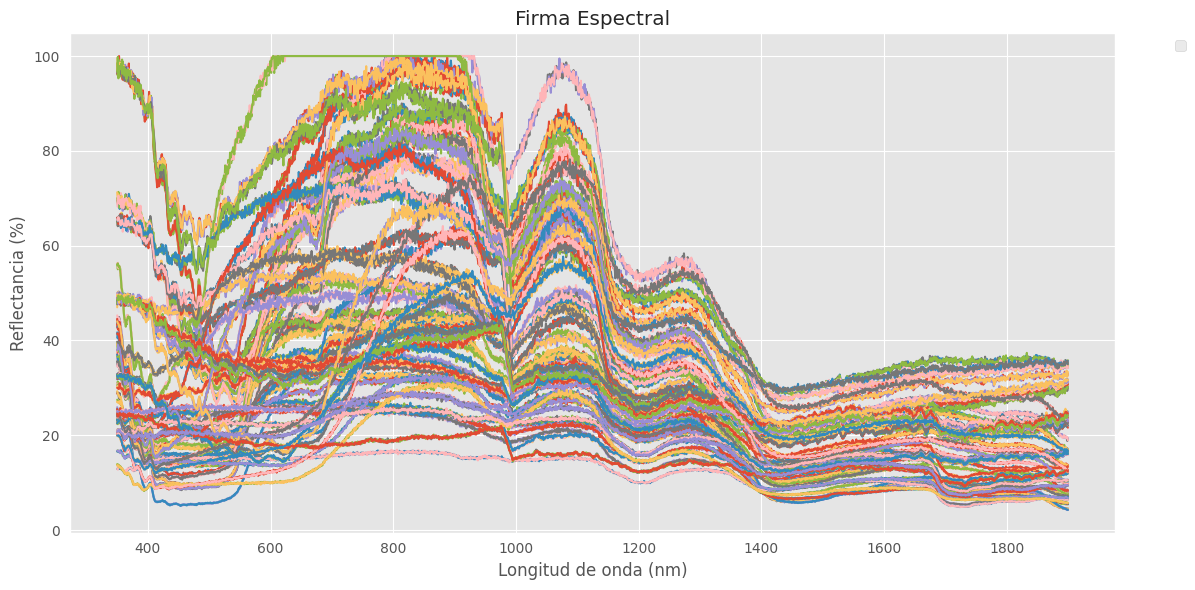


🔍 Firma espectral para material: 14BER


/tmp/ipython-input-1036788794.py:177: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


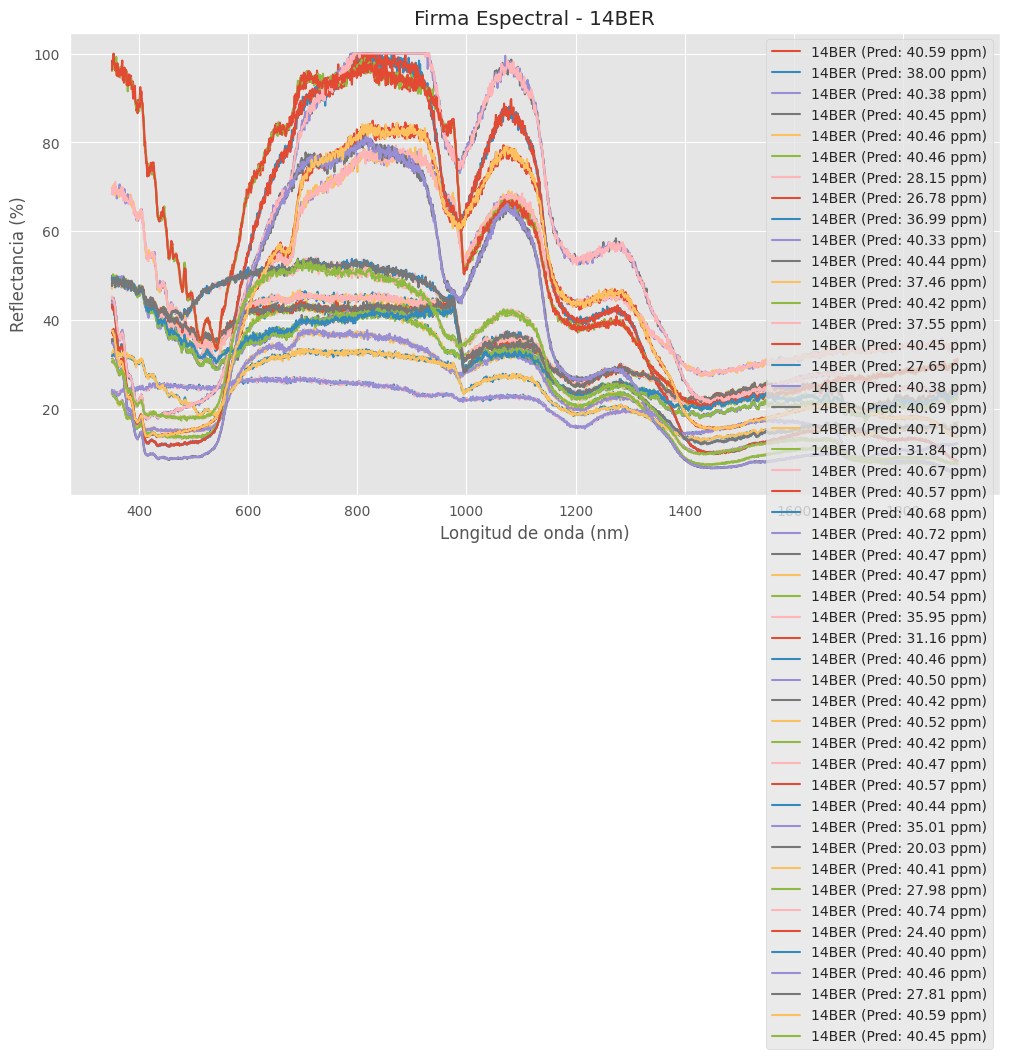


📊 Análisis SHAP de importancia de variables:


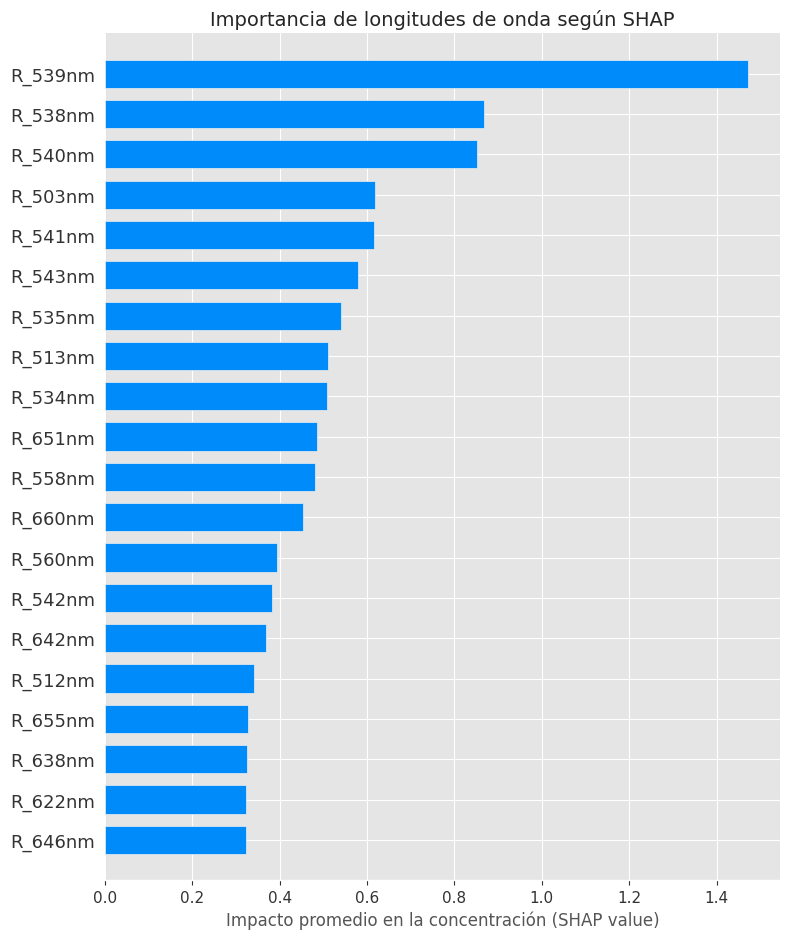

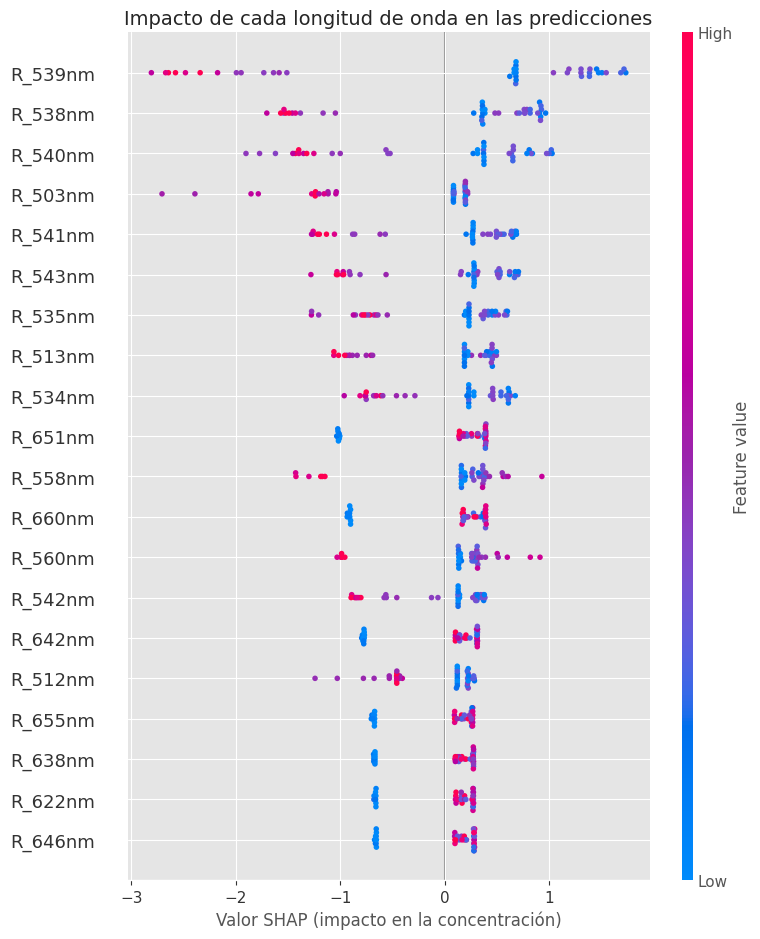

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import shap

# Configuración de nombres de materiales
MATERIAL_MAPPING = {
    'MORADA': 'MORADA',
    'AMARILLA': 'AMARILLA',
    'BLANCA': 'BLANCA',
    '6KUR': '6KUR',
    '14BER': '14BER',
    'PURPLE': 'MORADA',
    'YELLOW': 'AMARILLA',
    'WHITE': 'BLANCA'
}

# 1. Función para cargar datos de concentración de carotenoides
def cargar_datos_concentracion(ruta_archivo):
    """
    Carga y procesa los datos de concentración de carotenoides

    Args:
        ruta_archivo: Path al archivo CSV con los datos de concentración

    Returns:
        DataFrame con los datos procesados o None si hay error
    """
    try:
        datos_conc = pd.read_csv(ruta_archivo)
        print("\n🔍 Datos crudos de concentración:")
        print(datos_conc.head())

        # Normalización de nombres de materiales
        datos_conc['Material'] = datos_conc['Material'].str.upper().str.strip()
        datos_conc['Material'] = datos_conc['Material'].map(MATERIAL_MAPPING).fillna(datos_conc['Material'])

        # Calcular promedio de concentraciones
        datos_agregados = datos_conc.groupby('Material').agg({
            'ppmRefri': 'mean',
            'ppmTam': 'mean'
        }).reset_index()
        datos_agregados['ppmPromedio'] = datos_agregados[['ppmRefri', 'ppmTam']].mean(axis=1)

        print("\n📊 Materiales únicos en concentraciones:")
        print(datos_agregados['Material'].value_counts())

        return datos_agregados[['Material', 'ppmPromedio']]

    except Exception as e:
        print(f"\n❌ Error cargando concentraciones: {str(e)}")
        return None

# 2. Función para procesar datos espectrales
def procesar_datos_espectrales(directorio, factor_aumento=3):
    """
    Procesa los archivos espectrales y aplica aumento de datos

    Args:
        directorio: Directorio que contiene los archivos CSV espectrales
        factor_aumento: Número de copias aumentadas a generar por cada muestra

    Returns:
        DataFrame con los datos espectrales procesados
    """
    datos_espectrales = []
    contador_materiales = {}

    for raiz, _, archivos in os.walk(directorio):
        for archivo in archivos:
            if archivo.endswith('.csv') and "(1)" not in archivo:
                ruta_archivo = os.path.join(raiz, archivo)
                try:
                    df = pd.read_csv(ruta_archivo)

                    # Verificar columnas requeridas
                    if not all(col in df.columns for col in ['Wvl', 'Reflect. %', 'Material']):
                        print(f"Archivo {archivo} no tiene las columnas requeridas")
                        continue

                    # Procesar cada material
                    for material_crudo in df['Material'].unique():
                        material = MATERIAL_MAPPING.get(str(material_crudo).strip().upper())

                        if material not in MATERIAL_MAPPING.values():
                            continue

                        # Contar materiales
                        contador_materiales[material] = contador_materiales.get(material, 0) + 1

                        # Filtrar datos para este material
                        datos_material = df[df['Material'].str.strip().str.upper() == material_crudo.strip().upper()]

                        # Aumentar datos
                        for _ in range(factor_aumento):
                            registro_espectral = {'Material': material, 'archivo_origen': archivo}

                            # Generar ruido único para cada longitud de onda
                            ruido = np.random.normal(0, 0.01, len(datos_material))

                            for i, fila in datos_material.reset_index(drop=True).iterrows():
                                longitud_onda = int(fila['Wvl'])
                                reflectancia = float(fila['Reflect. %']) * (1 + ruido[i])
                                registro_espectral[f'R_{longitud_onda}nm'] = np.clip(reflectancia, 0, 100)

                            datos_espectrales.append(pd.DataFrame([registro_espectral]))

                except Exception as e:
                    print(f"Error procesando {archivo}: {str(e)}")
                    continue

    # Reporte de materiales procesados
    print("\nResumen de materiales procesados:")
    for material, conteo in contador_materiales.items():
        print(f"{material}: {conteo} archivos")

    if not datos_espectrales:
        raise ValueError("No se encontraron datos espectrales válidos")

    datos_completos = pd.concat(datos_espectrales, ignore_index=True)
    print(f"\nTotal de muestras generadas: {len(datos_completos)}")
    print("Distribución final de materiales:")
    print(datos_completos['Material'].value_counts())

    return datos_completos

# 3. Función para visualizar firmas espectrales
def visualizar_firma_espectral(modelo, datos_espectrales, nombre_material=None):
    """
    Grafica la firma espectral y muestra las predicciones del modelo

    Args:
        modelo: Modelo RandomForest entrenado
        datos_espectrales: DataFrame con los datos espectrales
        nombre_material: Nombre del material a visualizar (opcional)
    """
    plt.figure(figsize=(12, 6))

    # Filtrar por material si se especifica
    if nombre_material:
        datos_espectrales = datos_espectrales[datos_espectrales['Material'] == nombre_material.upper().strip()]
        if datos_espectrales.empty:
            print(f"\n❌ Material '{nombre_material}' no encontrado")
            return

    # Obtener longitudes de onda
    longitudes_onda = [int(col.split('_')[1].replace('nm', '')) for col in datos_espectrales.columns if col.startswith('R_')]
    longitudes_onda.sort()

    # Graficar cada muestra
    for idx, fila in datos_espectrales.iterrows():
        # Extraer valores espectrales
        valores_espectrales = [fila[f'R_{wl}nm'] for wl in longitudes_onda]

        # Predecir concentración
        X_pred = pd.DataFrame([fila.filter(regex='^R_\d+nm$')])
        pred_conc = modelo.predict(X_pred)[0]

        # Graficar
        etiqueta = f"{fila['Material']} (Pred: {pred_conc:.2f} ppm)" if nombre_material else None
        plt.plot(longitudes_onda, valores_espectrales, label=etiqueta)

    plt.title(f'Firma Espectral{" - " + nombre_material if nombre_material else ""}')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Reflectancia (%)')
    plt.grid(True)

    if nombre_material:
        plt.legend()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# 4. Función para análisis SHAP
def analisis_shap(modelo, X_test):
    """
    Realiza el análisis de importancia de variables usando SHAP

    Args:
        modelo: Modelo entrenado
        X_test: Datos de prueba
    """
    # Crear explainer SHAP
    explainer = shap.TreeExplainer(modelo)

    # Calcular valores SHAP (usar muestra si el dataset es grande)
    if len(X_test) > 100:
        muestra = X_test.sample(100, random_state=42)
        shap_values = explainer.shap_values(muestra)
        X_test_muestra = muestra
    else:
        shap_values = explainer.shap_values(X_test)
        X_test_muestra = X_test

    # Configurar estilo de gráficos
    plt.style.use('ggplot')

    # Gráfico de importancia global
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_muestra, plot_type="bar", show=False)
    plt.title("Importancia de longitudes de onda según SHAP", fontsize=14)
    plt.xlabel("Impacto promedio en la concentración (SHAP value)", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Gráfico de resumen SHAP
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_muestra, show=False)
    plt.title("Impacto de cada longitud de onda en las predicciones", fontsize=14)
    plt.xlabel("Valor SHAP (impacto en la concentración)", fontsize=12)
    plt.tight_layout()
    plt.show()

# 5. Función principal
def main():
    print("=== ANÁLISIS DE CONCENTRACIÓN DE CAROTENOIDES EN ZANAHORIAS ===")

    # Cargar datos de concentración
    ruta_conc = "/content/drive/MyDrive/TESIS_ZANAHORIA/Espectral/Semana1_concentraciones.csv"
    datos_conc = cargar_datos_concentracion(ruta_conc)
    if datos_conc is None:
        return

    # Procesar datos espectrales
    directorio_espectral = "/content/drive/MyDrive/Colab Notebooks/Espectral/Data/"
    datos_espectral = procesar_datos_espectrales(directorio_espectral)

    if datos_espectral is None:
        print("\n❌ No se pudieron procesar datos espectrales")
        return

    # Combinar datos
    datos_combinados = pd.merge(
        datos_espectral,
        datos_conc,
        on='Material',
        how='inner'
    )

    if datos_combinados.empty:
        print("\n❌ No hay materiales en común entre los datasets")
        return

    # Balancear datos
    min_muestras = datos_combinados['Material'].value_counts().min()
    datos_balanceados = datos_combinados.groupby('Material').apply(
        lambda x: x.sample(min_muestras, random_state=42)
    ).reset_index(drop=True)

    # Preparar datos para el modelo
    X = datos_balanceados.filter(regex='^R_\d+nm$')
    y = datos_balanceados['ppmPromedio']

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=datos_balanceados['Material']
    )

    # Entrenar modelo
    modelo = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    modelo.fit(X_train, y_train)

    # Evaluar modelo
    y_pred = modelo.predict(X_test)
    print("\n📈 Resultados del modelo:")
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f} ppm")

    # Visualización de firmas espectrales
    print("\n🎨 Visualización de Firmas Espectrales:")
    visualizar_firma_espectral(modelo, datos_balanceados)

    # Visualizar firma para un material específico
    material_ejemplo = datos_balanceados['Material'].iloc[0]
    print(f"\n🔍 Firma espectral para material: {material_ejemplo}")
    visualizar_firma_espectral(modelo, datos_balanceados, material_ejemplo)

    # Análisis SHAP
    print("\n📊 Análisis SHAP de importancia de variables:")
    analisis_shap(modelo, X_test)

if __name__ == "__main__":
    main()

=== CAROTENOID CONCENTRATION ANALYSIS IN CARROTS ===

🔍 Raw concentration data:
  Dia_muestreo  Material  Replica  AbsorbanciaRefri  AbsorbanciaTam  \
0    9/10/2024    Morada        1             0.120           0.110   
1    9/10/2024  Amarilla        1             0.110           0.110   
2    9/10/2024    Blanca        1             0.110           0.050   
3    9/10/2024      6KUR        1             0.423           0.381   
4    9/10/2024     14BER        1             0.430           0.377   

    ppmRefri     ppmTam  
0   7.354289   4.905068  
1   4.905068   4.905068  
2   4.905068   0.000000  
3  81.565701  71.278971  
4  83.280156  70.299282  

📊 Unique materials in concentration data:
Material
14BER     1
6KUR      1
PURPLE    1
WHITE     1
YELLOW    1
Name: count, dtype: int64

Processed materials summary:
6KUR: 16 files
WHITE: 16 files
PURPLE: 16 files
14BER: 16 files

Total samples generated: 192
Final material distribution:
Material
6KUR      48
WHITE     48
PURPLE    4

/tmp/ipython-input-1950026283.py:252: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = merged_data.groupby('Material').apply(



📈 Model results:
R²: 0.877
RMSE: 6.754 ppm

🎨 Spectral Signature Visualization:


/tmp/ipython-input-1950026283.py:175: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


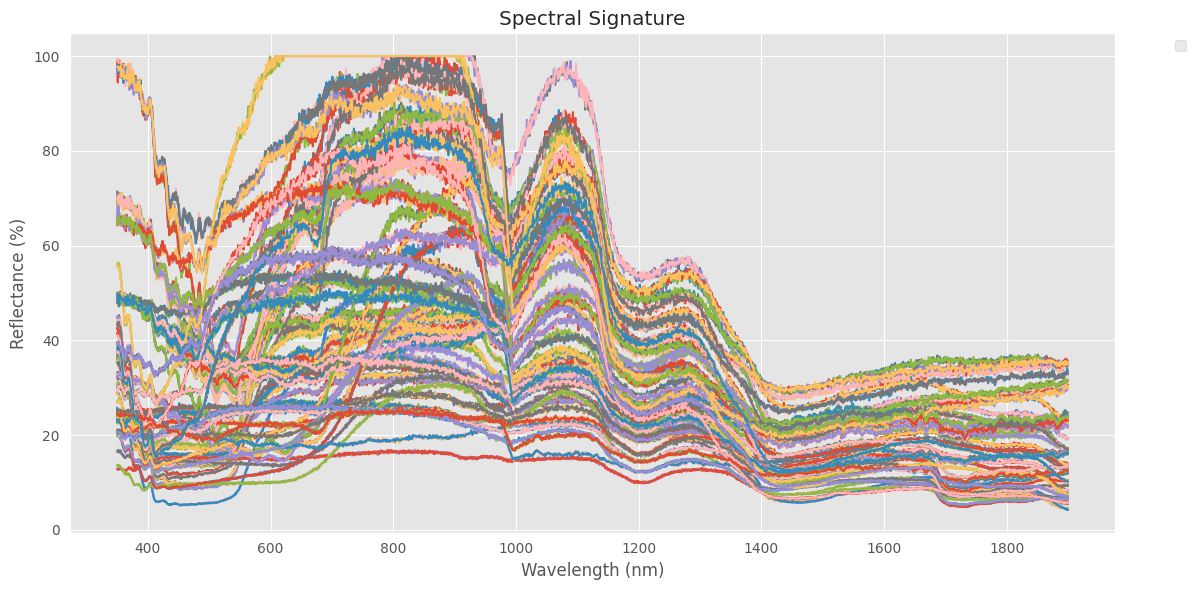


🔍 Spectral signature for material: 14BER


/tmp/ipython-input-1950026283.py:177: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


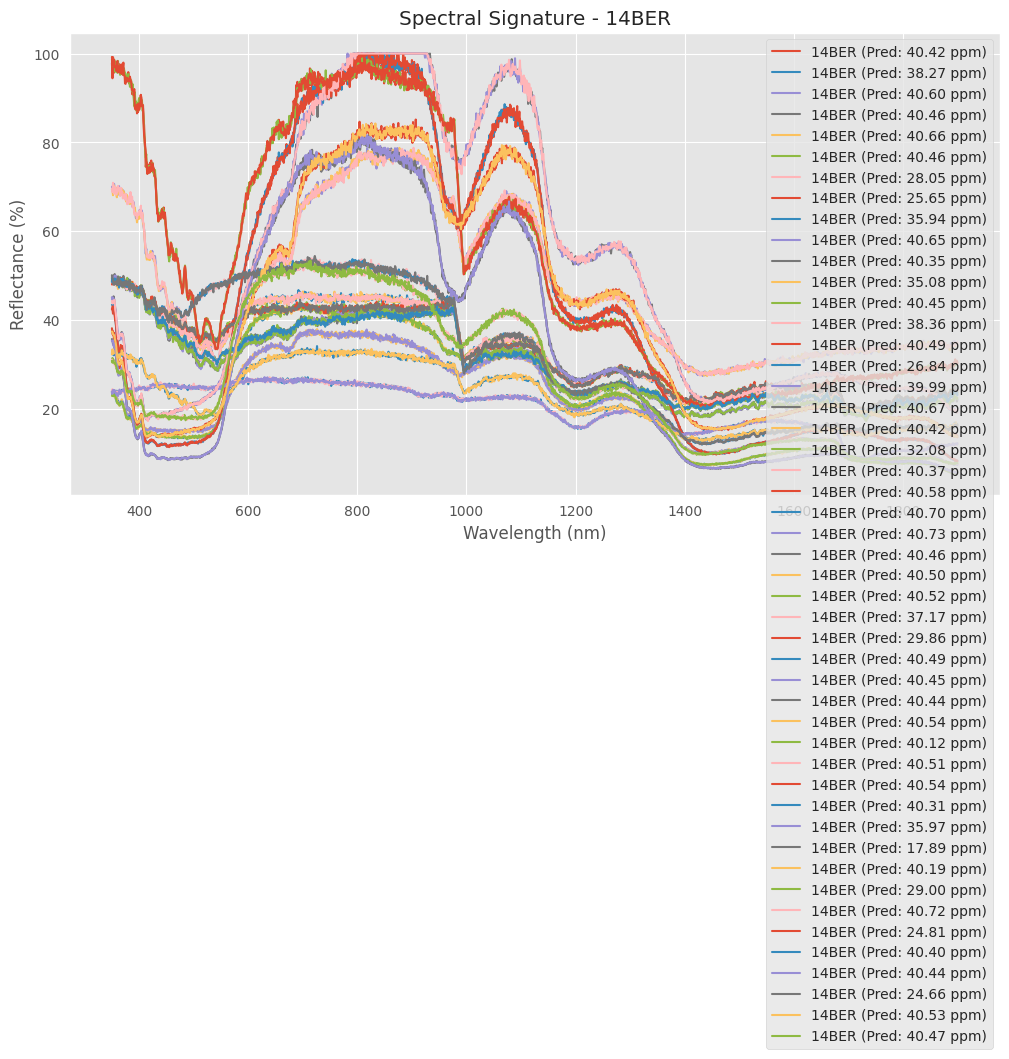


📊 SHAP Feature Importance Analysis:


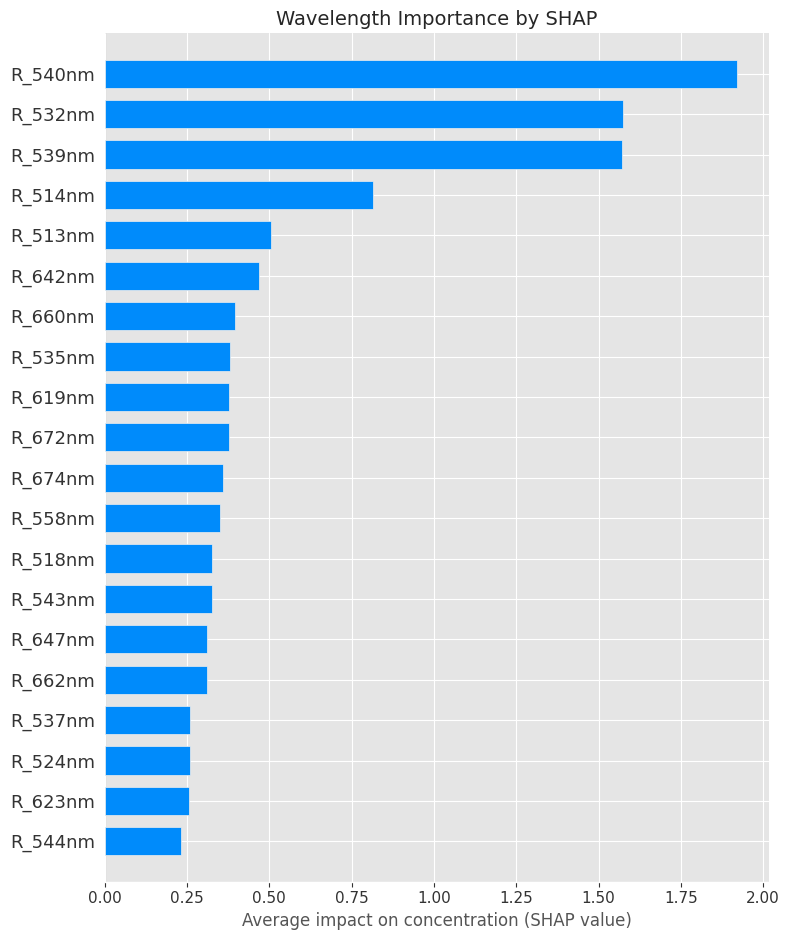

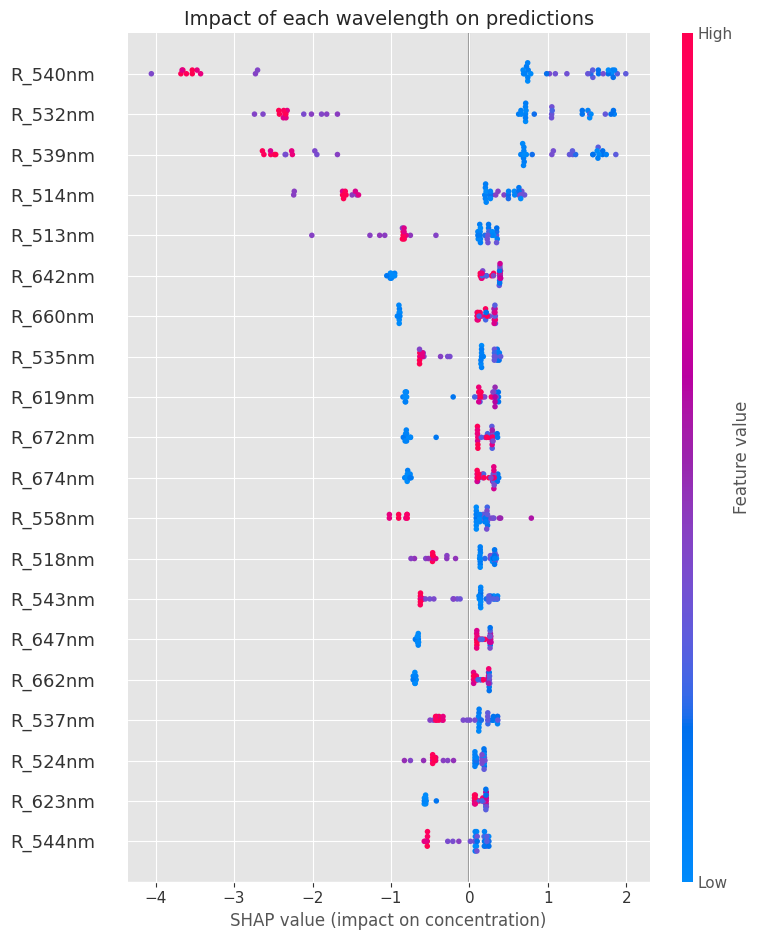

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import shap

# Material name mapping
MATERIAL_MAPPING = {
    'MORADA': 'PURPLE',
    'AMARILLA': 'YELLOW',
    'BLANCA': 'WHITE',
    '6KUR': '6KUR',
    '14BER': '14BER',
    'PURPLE': 'PURPLE',
    'YELLOW': 'YELLOW',
    'WHITE': 'WHITE'
}

# 1. Function to load carotenoid concentration data
def load_concentration_data(file_path):
    """
    Loads and processes carotenoid concentration data

    Args:
        file_path: Path to CSV file with concentration data

    Returns:
        Processed DataFrame or None if error occurs
    """
    try:
        conc_data = pd.read_csv(file_path)
        print("\n🔍 Raw concentration data:")
        print(conc_data.head())

        # Normalize material names
        conc_data['Material'] = conc_data['Material'].str.upper().str.strip()
        conc_data['Material'] = conc_data['Material'].map(MATERIAL_MAPPING).fillna(conc_data['Material'])

        # Calculate average concentrations
        agg_data = conc_data.groupby('Material').agg({
            'ppmRefri': 'mean',
            'ppmTam': 'mean'
        }).reset_index()
        agg_data['Avg_ppm'] = agg_data[['ppmRefri', 'ppmTam']].mean(axis=1)

        print("\n📊 Unique materials in concentration data:")
        print(agg_data['Material'].value_counts())

        return agg_data[['Material', 'Avg_ppm']]

    except Exception as e:
        print(f"\n❌ Error loading concentration data: {str(e)}")
        return None

# 2. Function to process spectral data
def process_spectral_data(directory, augmentation_factor=3):
    """
    Processes spectral files and applies data augmentation

    Args:
        directory: Directory containing spectral CSV files
        augmentation_factor: Number of augmented copies to generate per sample

    Returns:
        Processed spectral DataFrame
    """
    spectral_data = []
    material_count = {}

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv') and "(1)" not in file:
                file_path = os.path.join(root, file)
                try:
                    df = pd.read_csv(file_path)

                    # Verify required columns
                    if not all(col in df.columns for col in ['Wvl', 'Reflect. %', 'Material']):
                        print(f"File {file} missing required columns")
                        continue

                    # Process each material
                    for raw_material in df['Material'].unique():
                        material = MATERIAL_MAPPING.get(str(raw_material).strip().upper())

                        if material not in MATERIAL_MAPPING.values():
                            continue

                        # Count materials
                        material_count[material] = material_count.get(material, 0) + 1

                        # Filter data for this material
                        material_data = df[df['Material'].str.strip().str.upper() == raw_material.strip().upper()]

                        # Data augmentation
                        for _ in range(augmentation_factor):
                            spectral_record = {'Material': material, 'source_file': file}

                            # Generate unique noise for each wavelength
                            noise = np.random.normal(0, 0.01, len(material_data))

                            for i, row in material_data.reset_index(drop=True).iterrows():
                                wavelength = int(row['Wvl'])
                                reflectance = float(row['Reflect. %']) * (1 + noise[i])
                                spectral_record[f'R_{wavelength}nm'] = np.clip(reflectance, 0, 100)

                            spectral_data.append(pd.DataFrame([spectral_record]))

                except Exception as e:
                    print(f"Error processing {file}: {str(e)}")
                    continue

    # Material processing report
    print("\nProcessed materials summary:")
    for material, count in material_count.items():
        print(f"{material}: {count} files")

    if not spectral_data:
        raise ValueError("No valid spectral data found")

    full_data = pd.concat(spectral_data, ignore_index=True)
    print(f"\nTotal samples generated: {len(full_data)}")
    print("Final material distribution:")
    print(full_data['Material'].value_counts())

    return full_data

# 3. Function to plot spectral signatures
def plot_spectral_signature(model, spectral_data, material_name=None):
    """
    Plots spectral signatures and shows model predictions

    Args:
        model: Trained RandomForest model
        spectral_data: DataFrame with spectral data
        material_name: Specific material to plot (optional)
    """
    plt.figure(figsize=(12, 6))

    # Filter by material if specified
    if material_name:
        spectral_data = spectral_data[spectral_data['Material'] == material_name.upper().strip()]
        if spectral_data.empty:
            print(f"\n❌ Material '{material_name}' not found")
            return

    # Get wavelengths
    wavelengths = [int(col.split('_')[1].replace('nm', '')) for col in spectral_data.columns if col.startswith('R_')]
    wavelengths.sort()

    # Plot each sample
    for idx, row in spectral_data.iterrows():
        # Extract spectral values
        spectral_values = [row[f'R_{wl}nm'] for wl in wavelengths]

        # Predict concentration
        X_pred = pd.DataFrame([row.filter(regex='^R_\d+nm$')])
        pred_conc = model.predict(X_pred)[0]

        # Plot
        label = f"{row['Material']} (Pred: {pred_conc:.2f} ppm)" if material_name else None
        plt.plot(wavelengths, spectral_values, label=label)

    plt.title(f'Spectral Signature{" - " + material_name if material_name else ""}')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance (%)')
    plt.grid(True)

    if material_name:
        plt.legend()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# 4. SHAP analysis function
def shap_analysis(model, X_test):
    """
    Performs SHAP analysis for feature importance

    Args:
        model: Trained model
        X_test: Test data
    """
    # Create SHAP explainer
    explainer = shap.TreeExplainer(model)

    # Calculate SHAP values (use sample if dataset is large)
    if len(X_test) > 100:
        sample = X_test.sample(100, random_state=42)
        shap_values = explainer.shap_values(sample)
        X_test_sample = sample
    else:
        shap_values = explainer.shap_values(X_test)
        X_test_sample = X_test

    # Set plot style
    plt.style.use('ggplot')

    # Global importance plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
    plt.title("Wavelength Importance by SHAP", fontsize=14)
    plt.xlabel("Average impact on concentration (SHAP value)", fontsize=12)
    plt.tight_layout()
    plt.show()

    # Summary plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test_sample, show=False)
    plt.title("Impact of each wavelength on predictions", fontsize=14)
    plt.xlabel("SHAP value (impact on concentration)", fontsize=12)
    plt.tight_layout()
    plt.show()

# 5. Main function
def main():
    print("=== CAROTENOID CONCENTRATION ANALYSIS IN CARROTS ===")

    # Load concentration data
    conc_path = "/content/drive/MyDrive/TESIS_ZANAHORIA/Espectral/Semana1_concentraciones.csv"
    conc_data = load_concentration_data(conc_path)
    if conc_data is None:
        return

    # Process spectral data
    spectral_dir = "/content/drive/MyDrive/Colab Notebooks/Espectral/Data/"
    spectral_data = process_spectral_data(spectral_dir)

    if spectral_data is None:
        print("\n❌ Failed to process spectral data")
        return

    # Merge data
    merged_data = pd.merge(
        spectral_data,
        conc_data,
        on='Material',
        how='inner'
    )

    if merged_data.empty:
        print("\n❌ No common materials between datasets")
        return

    # Balance data
    min_samples = merged_data['Material'].value_counts().min()
    balanced_data = merged_data.groupby('Material').apply(
        lambda x: x.sample(min_samples, random_state=42)
    ).reset_index(drop=True)

    # Prepare model data
    X = balanced_data.filter(regex='^R_\d+nm$')
    y = balanced_data['Avg_ppm']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=balanced_data['Material']
    )

    # Train model
    model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    print("\n📈 Model results:")
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f} ppm")

    # Spectral signature visualization
    print("\n🎨 Spectral Signature Visualization:")
    plot_spectral_signature(model, balanced_data)

    # Plot for specific material
    example_material = balanced_data['Material'].iloc[0]
    print(f"\n🔍 Spectral signature for material: {example_material}")
    plot_spectral_signature(model, balanced_data, example_material)

    # SHAP analysis
    print("\n📊 SHAP Feature Importance Analysis:")
    shap_analysis(model, X_test)

if __name__ == "__main__":
    main()